In [23]:
import pandas as pd

df = pd.read_csv('performance_evaluation_mohito-fcfs-ntf(1).csv')

In [24]:
edf = df[['ag','ol', 'seed', 'type','reward', 'index']].groupby(['ag', 'ol', 'seed', 'type', 'index']).sum().reset_index()

print(edf[['ag','ol','seed','index']].groupby(['ag','ol','index']).nunique())

             seed
ag ol index      
2  1  1        10
   2  2        10
   3  3        10
3  1  1        10
   2  2        10
   3  3        10
4  1  1        10
   2  2        10
   3  3        10


['FCFS', 'NTF']
FCFS :  WilcoxonResult(statistic=6.0, pvalue=2.132533058918149e-16)
Mean difference:  27.478888888888882
NTF :  WilcoxonResult(statistic=173.0, pvalue=7.148911027399468e-14)
Mean difference:  6.995555555555552


/tmp/ipykernel_1646428/996004966.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mohito.sort_values(by=['ag', 'ol', 'seed'], inplace=True)
/tmp/ipykernel_1646428/996004966.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy.sort_values(by=['ag', 'ol', 'seed'], inplace=True)
/tmp/ipykernel_1646428/996004966.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mohito.sort_values(by=['ag', 'ol', 'seed'], inplace=True)
/tmp/ip

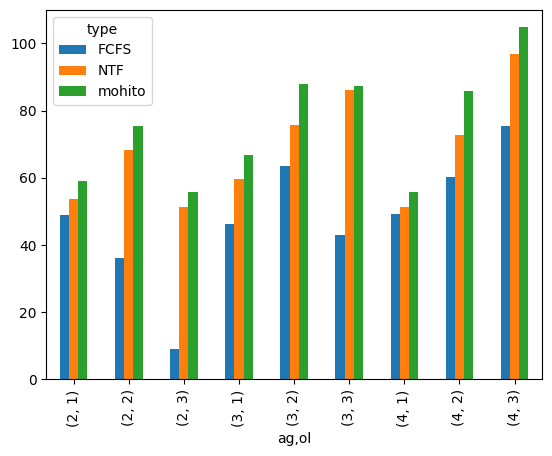

In [25]:
policies = edf['type'].unique().tolist()
policies.remove('mohito')
print(policies)

from scipy import stats

df = pd.read_csv('performance_evaluation_mohito-fcfs-ntf(1).csv')

pdframe = df[['ag', 'agent', 'ol', 'seed', 'type', 'reward']].reset_index()

#sum over steps
pdframe = pdframe.groupby(['ag', 'ol', 'seed', 'type', 'index', 'agent']).sum().reset_index()

#mean over agents
pdframe = pdframe.groupby(['ag', 'ol', 'seed', 'type', 'index']).mean().reset_index()

#sum over steps
pdframe = pdframe.groupby(['ag', 'ol', 'seed', 'type']).sum().reset_index()

#mean over episodes
pdframe.pivot_table(index=['ag', 'ol'], columns='type', values='reward', aggfunc='mean').plot(kind='bar')


#wilcoxon between types
for type in policies:
    mohito = pdframe[pdframe['type'] == 'mohito']
    mohito.sort_values(by=['ag', 'ol', 'seed'], inplace=True)
    mohito = mohito.reset_index()

    policy = pdframe[pdframe['type'] == type]
    policy.sort_values(by=['ag', 'ol', 'seed'], inplace=True)
    policy = policy.reset_index()




    assert mohito['ag'].equals(policy['ag']), "keys line up"
    assert mohito['ol'].equals(policy['ol']), "keys line up"
    assert mohito['seed'].equals(policy['seed']), "keys line up"

    print(type, ": ", stats.wilcoxon(mohito['reward'], policy['reward']))
    print("Mean difference: ", (mohito['reward'] - policy['reward']).mean())

/tmp/ipykernel_1646428/595180767.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edfGrouped = pg_ella_dfe.groupby(['ol'])
/tmp/ipykernel_1646428/595180767.py:64: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = group.copy().pivot_table(index=['ag'], columns=['type'], values='reward', aggfunc='mean')
/tmp/ipykernel_1646428/595180767.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tablestd = group.copy().pivot_table(index=['ag'], columns=['type'], values='reward'

type  MOHITO   FCFS    NTF  TaO-PGELLA
ag                                    
2      59.08  49.00  53.82       -46.0
3      66.84  46.13  59.68       -18.0
4      55.84  49.32  51.20       -22.0 0
type  MOHITO   FCFS    NTF  TaO-PGELLA
ag                                    
2      75.29  36.24  68.38      -136.0
3      88.03  63.44  75.58      -106.0
4      85.84  60.18  72.70       -10.0 1
type  MOHITO   FCFS    NTF  TaO-PGELLA
ag                                    
2      55.72   8.94  51.32      -510.0
3      87.44  42.92  86.24      -190.0
4     104.72  75.32  96.92       -80.0 2


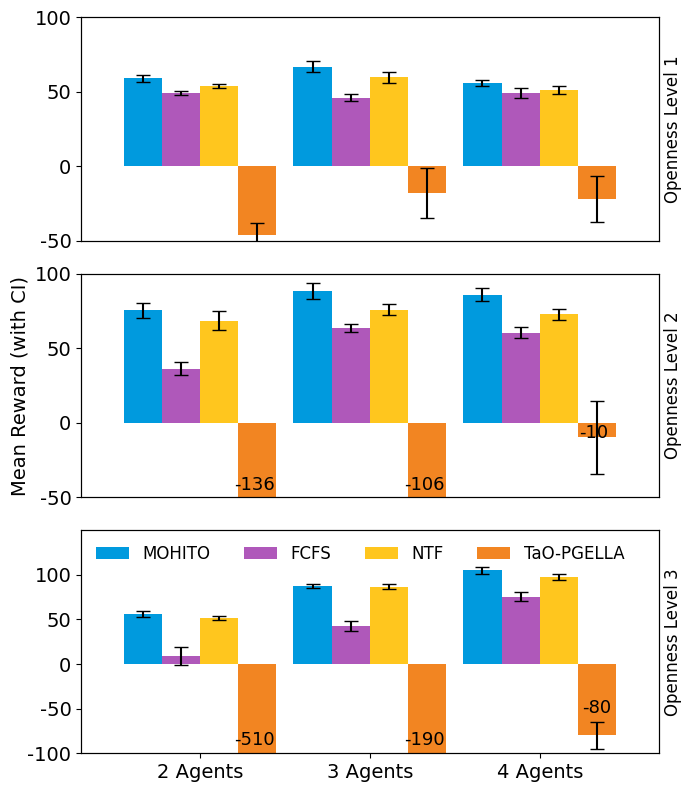

In [26]:
import math

edf['type'] = edf['type'].str.replace('mohito', 'MOHITO')

edf['type'] = edf['type'].str.replace('TaO-PG-ELLA', 'TaO-PGELLA')

typedtype = pd.CategoricalDtype(['MOHITO','FCFS','NTF','TaO-PGELLA'], ordered=True)

typedOL = pd.CategoricalDtype([1,2,3], ordered=True)

edf['type'] = edf['type'].astype(typedtype)
edf['ol'] = edf['ol'].astype(typedOL)


#seperately recorded (follow TaO-PG_ELLA trainer help to reproduce)
pg_ella = [
    {'type': 'TaO-PGELLA', 'ol': 1, 'ag': 2, 'reward': -46, 'std': 21.11},
    {'type': 'TaO-PGELLA', 'ol': 1, 'ag': 3, 'reward': -18, 'std': 44.59},
    {'type': 'TaO-PGELLA', 'ol': 1, 'ag': 4, 'reward': -22, 'std': 41.60},
    {'type': 'TaO-PGELLA', 'ol': 2, 'ag': 2, 'reward': -136, 'std': 25.51},
    {'type': 'TaO-PGELLA', 'ol': 2, 'ag': 3, 'reward': -106, 'std': 94.35},
    {'type': 'TaO-PGELLA', 'ol': 2, 'ag': 4, 'reward': -10, 'std': 65.53},
    {'type': 'TaO-PGELLA', 'ol': 3, 'ag': 2, 'reward': -510, 'std': 12.16},
    {'type': 'TaO-PGELLA', 'ol': 3, 'ag': 3, 'reward': -190, 'std': 2.28},
    {'type': 'TaO-PGELLA', 'ol': 3, 'ag': 4, 'reward': -80, 'std': 40.45},
]

pg_ella_df = pd.DataFrame(pg_ella)

pg_ella_df['type'] = pg_ella_df['type'].astype(typedtype)
pg_ella_df['ol'] = pg_ella_df['ol'].astype(typedOL)


pg_ella_dfe = pd.concat([edf, pg_ella_df])

edfGrouped = pg_ella_dfe.groupby(['ol'])

print(edfGrouped)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, figsize=(10,10))

colors = [
    ['black', 'black', 'black'],
    ['blue', 'blue', 'blue'],
    ['green', 'green', 'green']
]

color_dict = {
    'MOHITO': '#cbd14d',
    'FCFS': '#4dbfc6',
    'NTF': '#4d8390',
    'TaO-PGELLA': '#d9e4f1'
}

colors = ['#009ADE','#AF58BA','#FFC61E','#F28522']



for i, (name, group) in enumerate(edfGrouped):

    table = group.copy().pivot_table(index=['ag'], columns=['type'], values='reward', aggfunc='mean')
    tablestd = group.copy().pivot_table(index=['ag'], columns=['type'], values='reward', aggfunc='std')

    tablestd['TaO-PGELLA'] = pg_ella_df[pg_ella_df['ol'] == name[0]].groupby(['ag'])['std'].mean()

    # print(tablestd)

    # print(table_std)

    tablestd = 2.04523 * tablestd / math.sqrt(30)

    # print(pg_ella_df[pg_ella_df['ol'] == name[0]].groupby(['ag'])['std'].sum())

    table.plot(kind='bar', ax=ax[i], color = colors, width=0.9, alpha=1.0, yerr = tablestd, capsize=5, figsize=(7,8))

    # ax[i].set_title(f'Openness Level {name[0]}', weight='bold', size=12)
    print(table, i)
    tx = ax[i].twinx()
    tx.set_ylabel(f"Openness Level {name[0]}", size=12)
    tx.set_yticks([])

for i in ax:
    i.get_legend().remove()
    i.set_xlabel('')
    i.set_xticks([])
    y_bound = i.get_ybound()
    i.set_yticks([-150, -100, -50, 0, 50, 100], labels=[-150, -100, -50, 0, 50, 100], size=14)
    # i.set_yticks(size=12)
    i.set_ybound(y_bound)

# ax[0].('OL = 1')

ax[0].set_ybound(-50, 100)
ax[1].set_ybound(-50, 100)

ax[-1].set_xticks([0,1,2], rotation=0, labels=['2 Agents', '3 Agents', '4 Agents'], size=14)
ax[-1].set_ybound(-100,150)
ax[1].set_ylabel('Mean Reward (with CI)', size=14)
# ax[0].set_ylabel('Mean Reward (with CI)', size=14)
# ax[2].set_ylabel('Mean Reward (with CI)', size=14)
ax[-1].text(0.20, -90, '-510',size=13)
ax[-1].text(1.20, -90, '-190',size=13)
ax[-1].text(2.25, -55, '-80',size=13)


ax[1].text(0.20, -45, '-136',size=13)
ax[1].text(1.20, -45, '-106',size=13)
ax[1].text(2.23, -10, '-10',size=13)

ax[-1].legend(framealpha=0.0,title='',prop={'size':12}, ncol=4, loc='upper left')


plt.tight_layout(pad=1.0)
plt.savefig('performance_evaluation_mohito-updated.pdf')

In [28]:
pdf = pd.read_csv('performance_evaluation_mohito-fcfs-ntf(1).csv')[['ag', 'agent', 'ol', 'seed', 'index', 'type', 'ride_status']]

pdf['type'] = pdf['type'].str.replace('mohito', 'MOHITO')
pdf['type'] = pdf['type'].str.replace('TaO-PG-ELLA', 'TaO-PGELLA')

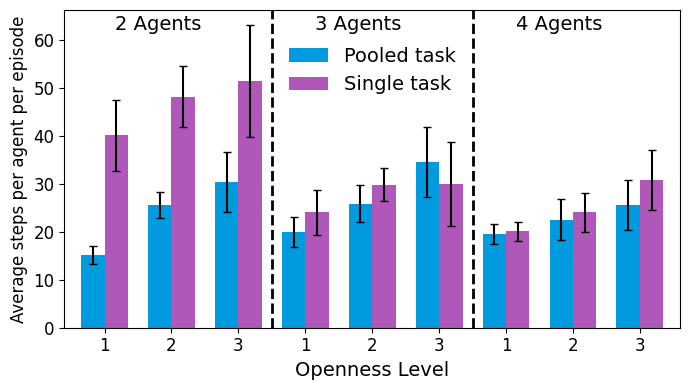

In [ ]:
pdf = pd.read_csv('performance_evaluation_mohito-fcfs-ntf(1).csv')[['ag', 'agent', 'ol', 'seed', 'type', 'pooling_status']]

pdf = pdf[(pdf['type'] == 'mohito') & (pdf['pooling_status'] != 'none')][['ag', 'agent','ol','seed','pooling_status', 'type']]

pdfg = pdf.groupby(['ag', 'agent', 'ol', 'seed', 'pooling_status']).count().reset_index()

pdfg['pooling_status'] = pdfg['pooling_status'].str.replace('single', 'Single task execution')
pdfg['pooling_status'] = pdfg['pooling_status'].str.replace('pooling', 'Pooled task execution')

# print(pdfg)

table = pdfg.copy().pivot_table(index=['ag','ol'], columns=['pooling_status'], values='type', aggfunc='mean', fill_value=0)
stdtable = pdfg.copy().pivot_table(index=['ag','ol'], columns=['pooling_status'], values='type', aggfunc='std', fill_value=0)

stdtable = 2.04523 * stdtable / math.sqrt(30)

colors = ['#009ADE','#AF58BA']

table.plot(kind='bar', stacked=False, yerr=stdtable, capsize=3, color=colors, figsize=(7,4), width=0.7)

plt.legend(title='',framealpha=0.0)

plt.xticks([
    0,1,2,3,4,5,6,7,8
], [
    '1',
    '2',
    '3',
    '1',
    '2',
    '3',
    '1',
    '2',
    '3',
], rotation=0, size=12, )

plt.xlabel('')
plt.ylabel('Average steps per agent per episode', size=12, )

# plt.tight_layout()
plt.yticks(size=12, )

ax = plt.gca()
l = plt.legend(prop={'size':14}, title='', framealpha=0.0, bbox_to_anchor=(2.5, 45.0), bbox_transform=ax.transData)
l.get_texts()[0].set_text('Pooled task')
l.get_texts()[1].set_text('Single task')

plt.axvline(x=2.5, color='black', linestyle='--', linewidth=2, label='_nolegend_')
plt.axvline(x=5.5, color='black', linestyle='--', linewidth=2, label='_nolegend_')

plt.text(0.15, 62, '2 Agents', size=14, )
plt.text(3.15, 62, '3 Agents', size=14, )
plt.text(6.15, 62, '4 Agents', size=14, )

plt.xlabel('Openness Level', size=14, )
plt.tight_layout()
# plt.title("Pooling Efficacy", size=12, weight='bold')

plt.savefig('pooling-efficacy-updated.pdf')
# plt.show()